In [1]:
# imports
import warnings
import pandas as pd
import matplotlib.pyplot as plt

DATAFOLDER = 'data'
warnings.filterwarnings("ignore")

# Milestone 1: 

In this notebook we develop the follwing sections for Milestone 1. 



<div class="toc"><ul class="toc-item1"><li><span><a href="#Problematic" data-toc-modified-id="Problematic">Problematic</a>
</div>
<div class="toc"><ul class="toc-item2"><li><span><a href="#Dataset" data-toc-modified-id="Dataset">Dataset</a>
</div>
<div class="toc"><ul class="toc-item2"><li><span><a href="#Exploratory Data Analysis" data-toc-modified-id="Exploratory Data Analysis">Exploratory Data Analysis</a>
</div>
<div class="toc"><ul class="toc-item2"><li><span><a href="#Related work" data-toc-modified-id="Related work">Related work</a>
</div>    
    
Students: Mariam Hakobyan (298698), Tianchi Yu (319877), Wenuka Gunarathna (309398)


## Problematic


The project aims to visualize the swiss transport connections in different parts of the country and provide statistical-graphical visualization on the nodes connectivity, travelling time from station to station and pessenger capacities. The main pillars of the visualization will be:

- **Swiss transport - map** composed of 
    - Scheduled transport movements in delta time,
    - Route maps.
- TODO **Figures** ( Wenuka please lets discuss to fix the figures we want to show)
    - Figure 2,3,4
    
    
The **overview** of the visualization will be a process of interactive map in modes and graphical figures for statistical story-telling.  


The **motivation** behind the idea is to visualize the process of the biggest almost-neutral CO2 transport system work in Switzerland.

The **target audience** is planned to include people who are interested in transportation systems, newtork visualizations, Switzerland and who are just curious about things in world. Will require a basic knowledge to understand the statistical figures.  


## Dataset

1. Sbb **schedule data** for normal weekdays/ends. The Dataset is Open source published by SBB
2. Swiss map, station coordinates, transportation map(api access)
3. Big station capacities


The **schedule data** is under consideration to be used to visualize the transport movements in time on map. We obtain the data from [Open Data Platform Swiss Public Transport](https://opentransportdata.swiss/en/dataset/timetable-2020-hrdf). New schedules are being updated by the publisher. We have considered to use 2020 March 1st schedule, although new schedule after COVID-19 epidemic's preventaive measures can be visualized as well to see the difference of the process change in transportation.  

TODO **Swiss Maps** what we will use and why,  some sources please refer to the word doc I put some things that I encounter 

The **Big station capacities** is about sharing the details about the train stations by the capacities of differnet stations in every cantons. The data set we are going to use comes from [Data Platform Swiss Public Transport](https://opentransportdata.swiss/en/dataset/einundaus), where we can find many information about all stations in Swiss and the number of passengers as well in 2018. With this data set, we can realise the visualisation about the capacities of stations and do some comparasion in the level of cantons and passengers.

## Exploratory Data Analysis

### Schedule Data
To read the txt file data several delimeters have been applied because of the structure of the text in the file. In the end we are intereted in the following attributes.

-- schedule_number -- route_number -- transport_type -- start_st_id -- end_st_id -- passing_st_ids -- passing_st_names -- st_arr_times -- st_dep_times 

In [2]:
# read the .txt file and split the schedules by the separator '*Z '
with open(DATAFOLDER + "/2020_03_01/FPLAN") as schedules:
    text = schedules.read()
result = text.split('*Z ')

In [3]:
sch_number, route_number, transport_type, start_st_id, end_st_id, passing_st_ids, passing_st_names, st_arr_times, st_dep_times = ([] for i in range(9))
for i in result[1:]:    
    a = i.split('*')
    # get the identical information about schedule 
    schedule_id = a[0].split()
    route_number.append(schedule_id[0])
    sch_number.append(schedule_id[-2])
    # get the identical information about route 
    route_info = a[1].split()
    transport_type.append(route_info[1])
    start_st_id.append(route_info[2])
    end_st_id.append(route_info[3])
    st_id, station_name, arr_time, dep_time = ([] for i in range(4))
    # the route detail
    overall_sch = a[-1].split('%\n')[1:-1]
    for j in overall_sch:
        route = j.strip().split('         ')
        station = route[0].split()
        st_id.append(station[0])
        station_name.append('-'.join(station[1:]))
        time = route[-1].split()
        arr_time.append(time[0])
        dep_time.append(time[-1])
    passing_st_ids.append(st_id)
    passing_st_names.append(station_name)
    st_arr_times.append(arr_time)
    st_dep_times.append(dep_time)

In [4]:
# making the dataframe from obtained lists 
data_dict = {'schedule_id': sch_number, 'route_number': route_number,'transport_type': transport_type,
            'start_station_ID': start_st_id,'end_station_ID': end_st_id, 'route_start_time': [time[0] for time in st_arr_times],
             'route_end_time': [time[-1] for time in st_dep_times],
            'passing_station_IDS': passing_st_ids,
            'passing_st_names': passing_st_names, 'arrival_times':st_arr_times, 'departure_times': st_dep_times}
data = pd.DataFrame.from_dict(data_dict)
data.head()

,schedule_id,route_number,transport_type,start_station_ID,end_station_ID,route_start_time,route_end_time,passing_station_IDS,passing_st_names,arrival_times,departure_times
0,12607908707,04700,RE,8014309,8014228,00447,00540,"[8014309, 8014289, 8014288, 8014283, 8014281, ...","[Offenburg, Appenweier, Renchen-(D), Achern, B...","[00447, 00452, 00456, 00501, 00506, 00513, 005...","[00447, 00453, 00457, 00502, 00507, 00514, 005..."
1,12606485457,04701,RE,8014228,8014309,00456,00541,"[8014228, 8014241, 8014245, 8014277, 8014281, ...","[Karlsruhe-Hbf, Muggensturm, Rastatt, Baden-Ba...","[00456, 00505, 00509, 00515, 00521, 00526, 005...","[00456, 00505, 00510, 00516, 00522, 00527, 005..."
2,12605476307,04702,RE,8014309,8014228,00546,00639,"[8014309, 8014289, 8014288, 8014283, 8014281, ...","[Offenburg, Appenweier, Renchen-(D), Achern, B...","[00546, 00550, 00555, 00559, 00604, 00611, 006...","[00546, 00551, 00555, 00600, 00605, 00612, 006..."
3,12611010807,04703,RE,8014521,8014586,00551,00725,"[8014521, 8014529, 8014533, 8014534, 8014554, ...","[Villingen-(Schwarzw), Donaueschingen-00601-00...","[00551, 8014529, 00609, 00615, 00632, 8014555,...","[00551, 00602, 00610, 00619, 00633, 00636, 006..."
4,12610946707,04704,RE,8014521,8014228,00535,00750,"[8014521, 8014518, 8014513, 8014511, 8014502, ...","[Villingen-(Schwarzw), St-Georgen-(Schwarzw-00...","[00535, 8014518, 00557, 8014511, 00619, 00625,...","[00535, 00544, 00558, 00612, 00621, 00626, 006..."


In [5]:
print("The number of available schedules until 2020 March 1st for a day in Switzerland: {}".format(data.shape[0]))

The number of available schedules until 2020 March 1st for a day in Switzerland: 473233


**T1.** We are interested to know the terminal stations with many initializing schedules. 

For now we have the station_ids only, there is a mapping of st_id <-> st_name stored as another dataset so we process it here.

In [6]:
# to get the name of the station ids we read the dataset 
with open(DATAFOLDER + "/2020_03_01/BAHNHOF") as stations:
    text = stations.read()
result = text.split('\n')

station_id, st_name = [], [] 
for i in result[:-1]:
    a = i.split()
    station_id.append(a[0])
    st_name.append('-'.join(a[1:]).split('$<')[0])
station_dict = {'station_id': station_id, 'station_name': st_name}
stations = pd.DataFrame.from_dict(station_dict)
stations.head()

,station_id,station_name
0,0000002,Bucuresti
1,0000003,Calais
2,0000004,Canterbury
3,0000005,Exeter
4,0000008,Frankfurt-Flughafen


Text(0.5, 0, 'Number of schedules originated from station in a day')

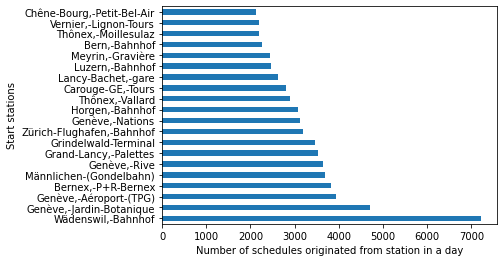

In [7]:
# plot the mostly used stations as a terminal point barchart.
b = pd.merge(data['start_station_ID'], stations, how = 'left', left_on = 'start_station_ID', right_on = 'station_id')
ax = b.station_name.value_counts()[:20].plot.barh(legend=False)
ax.set_ylabel('Start stations')
ax.set_xlabel('Number of schedules originated from station in a day')

**T2.** In map visualization we have an idea to color the moving dots (transports) based on the transportation_type, so that is why we are interested in the top 5 transportation types in the schedule.

Text(0.5, 0, 'Number of schedules for different route types')

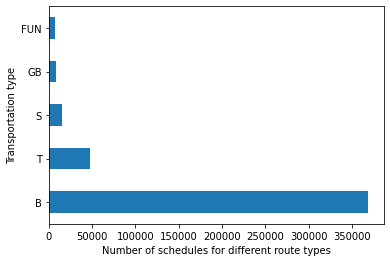

In [8]:
ax = data.transport_type.value_counts()[:5].plot.barh(legend=False)
ax.set_ylabel('Transportation type')
ax.set_xlabel('Number of schedules for different route types')

Here the "B" indicates buses, "T" to trams, "S" to short route regional trains, "GB" to lift and "FUN" to funiculor.  

**T3.** We are interested to visualize the distribution of the number of trains on time, to that reason **route_start_time** is used. We have noticed that some schedules have strange start time (e.i. 27:20) so we have cut this cases with 30h to see the outlier occurencies(further preprocessing will be done to see the schedules arising this time incosistency).   

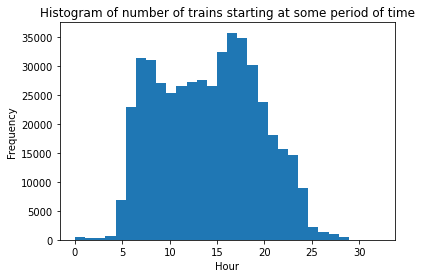

In [9]:
# the variable needs to be preprocessed to correctly identify the anomalies
data.route_start_time = abs(data.route_start_time.astype(int)/100)
n, bins, patches = plt.hist(data[data.route_start_time < 40].route_start_time, bins = 30)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Histogram of number of trains starting at some period of time')
plt.show()

Here we see that the schedule frequencies are high around 7-10h and 18-20h because of the commuters, so we should be able to see the same pattern on the map visualization while the time tick. 

## Station capacity and train capacity

**Basic information in this data set**

* The number of passengers of all stations of switzerland in 2018
* Code\shortname of stations
* Cantons & Cities
* The transport companies(SBB\MGB\...)

**Visualisation** The comparation of capacities of different big stations and cantons

In [10]:
df = pd.read_excel(DATAFOLDER +'/passengers2018.xlsx')

# get the size of the data set
print("The data contains passenger capacity information for {} stations in Switzerland.".format(df.shape[0]))
# get some sample of the data
df.head() 

The data contains passenger capacity information for 906 stations in Switzerland.


,Code,Bahnhof_Haltestelle,Kanton,Eigner,DTV_2018,DWV_2018,DNWV_2018,Bemerkungen,Remarques,Note,Remarks
0,AA,Aarau,AG,SBB,37900,44800,22700,Ohne AVA.,Sans AVA.,Senza AVA.,Without AVA.
1,AAT,Aathal,ZH,SBB,740,800,610,NaN,NaN,NaN,NaN
2,ABO,Aarburg-Oftringen,AG,SBB,2500,3000,1300,NaN,NaN,NaN,NaN
3,ACLA,Acla da Fontauna,GR,MGB,90,90,80,NaN,NaN,NaN,NaN
4,AD,Aadorf,TG,SBB,1700,2000,1000,Durchschnittswert 2018 durch Streckensperrung ...,Valeur moyenne 2018 à la baisse en raison de l...,Valore medio 2018 compromesso dallo sbarrament...,Average value for 2018 impacted by line closure.


<img src="data/image.png">

In [11]:
# change the name,and keep the useful data
df_p = df.fillna(value=0)
df_p = df_p.rename(columns = {'Code':'station_ID','Bahnhof_Haltestelle':'station_name/city', 'Kanton':'canton', 'Eigner':'company'})
data = df_p.iloc[:,0:7]
#data = data.set_index('station_ID')
data.head()

,station_ID,station_name/city,canton,company,DTV_2018,DWV_2018,DNWV_2018
0,AA,Aarau,AG,SBB,37900,44800,22700
1,AAT,Aathal,ZH,SBB,740,800,610
2,ABO,Aarburg-Oftringen,AG,SBB,2500,3000,1300
3,ACLA,Acla da Fontauna,GR,MGB,90,90,80
4,AD,Aadorf,TG,SBB,1700,2000,1000


In [ ]:
# Data cleaning
# set the number <50 to 49
data['DTV_2018'] = data['DTV_2018'].replace('<50','49')
data['DWV_2018'] = data['DWV_2018'].replace('<50','49')
data['DNWV_2018'] = data['DNWV_2018'].replace('<50','49')
#change the type of value in the data set
data['DTV_2018'] = data['DTV_2018'].astype('int')
data['DWV_2018'] = data['DWV_2018'].astype('int')
data['DNWV_2018'] = data['DNWV_2018'].astype('int')
# Merge the same company with different names
data['company'] = data['company'].replace('CFF','SBB')
data['company'] = data['company'].replace('FFS','SBB')
data.head()

* **First, define the Big Stations(with the average daily traffic in 2018 > 30000)**

In [ ]:
data_big = data.loc[(data['DTV_2018'] > 30000),['station_ID','station_name/city','canton','DTV_2018']]
data_big.head()

In [ ]:
# show the capacity of the biggest stations in different cantons of 2018
name_list = data_big['station_name/city']
num_list = data_big.DTV_2018
plt.figure(figsize=(10,4)) 
plt.xlabel('capacity/average number of passengers per day')
plt.ylabel('big stations')
plt.barh(range(len(name_list)), num_list, height=0.7, color='steelblue', alpha=0.8) 
plt.yticks(range(len(name_list)), name_list)
plt.xlim(30000,450000)

plt.title('The capacity of big stations(by the number of the passengers)')
plt.show()

* **Show the frequency of cantons in the level of big stations**

In [ ]:
big_canton_count = data_big.groupby('canton')['station_name/city'].count()
big_canton_count = big_canton_count.reset_index()
big_canton_count.head()

In [ ]:
# get the list of cantons
canton_list = data['canton'].drop_duplicates()
canton_list = canton_list.reset_index()
canton_left = pd.merge(canton_list['canton'],big_canton_count,how = 'left')
canton_left = canton_left.fillna(value=0)

# show the number of big sations in different cantons
name_list = canton_left['canton']
num_list = canton_left['station_name/city']
plt.figure(figsize=(10,10)) 
plt.xlabel('the number of big sations')
plt.ylabel('cantons')
values = plt.barh(range(len(name_list)), num_list, height=0.6, color='steelblue', alpha=0.8) 
plt.yticks(range(len(name_list)), name_list)
plt.xlim(0,10)
for value in values:
    width = value.get_width()
    plt.text( width+0.3,value.get_y(), str(width), ha="center", va="bottom")
plt.title('The number of big sations in different cantons')
plt.show()

**Visualisation** The passengers number in the comparny levels and in canton levels

* First, we can see the number of stations owned by different companies

In [ ]:
data_com = data.groupby('company')['station_ID'].count()
data_com = data_com.reset_index()
data_com

In [ ]:
plt.figure(figsize=(6,9)) 
name_list = data_com.company
num_list = data_com.station_ID
labels = name_list 
sizes = num_list 
colors = ['red','yellowgreen','lightskyblue','yellow',"blue","orange"] 
explode = (0,0,0.15,0,0,0) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = True, 
                      startangle =90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title('The frequency of different company in the level of stations')
plt.show()

* Moreover, we can visualise the inportance of different companies by the number of pessengers in their owned stations.

In [ ]:
data_com = data.groupby('company')['DTV_2018'].sum()
data_com = data_com.reset_index()
data_com.head()

In [ ]:
plt.figure(figsize=(6,6)) 
name_list = data_com.company
num_list = data_com.DTV_2018
labels = name_list 
sizes = num_list 
colors = ['red','yellowgreen','lightskyblue','yellow',"blue","orange"]
explode = (0,0,0.15,0,0,0) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      shadow = True, 
                      startangle =180, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title('The importance of different companies by the number of pessengers')
plt.show()

* And then, the percentage of passengers in different cantons is following to show

In [ ]:
data_can_p = data.groupby('canton')['DTV_2018'].sum()
data_can_p = data_can_p.reset_index()

In [ ]:
plt.figure(figsize=(8,8)) 
name_list = data_can_p.canton
num_list = data_can_p.DTV_2018
labels = name_list 
sizes = num_list 
colors = ['red','yellowgreen','lightskyblue','yellow',"blue","red","coral","green","yellow","orange"] 
#explode = (0,0,0,0) 
patches,text1,text2 = plt.pie(sizes,
                      #explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title('The percentage of passengers in different cantons')
plt.show()

**Visualisation** For each canton, we can compare the flow between the weekdays and weekends.

In [ ]:
data_flow = data.groupby('canton')['DWV_2018','DNWV_2018'].sum()
data_flow = data_flow.reset_index()
data_flow.head()

In [ ]:
# show the fraffic flows differences between weekdays and weekends/holidays
name_list = data_flow.canton
num_list1 = data_flow['DWV_2018']
num_list2 = data_flow['DNWV_2018']
plt.figure(figsize=(10,10)) 
plt.xlabel('canton')
plt.ylabel('capacity/number of passengers per day')

x = range(len(num_list1))
 
plt.bar(x, height = num_list1, width=0.4, label='DWV_2018',fc = 'y')
plt.bar([i + 0.4 for i in x], height = num_list2, width=0.4, label='DNWV_2018',fc = 'r')

#plt.tick_label = name_list
plt.xticks([index + 0.2 for index in x], name_list)
plt.title('The fraffic flows differences between weekdays and weekends/holidays')

plt.legend()
plt.show()

## Related work

While generating the idea we have encountered several projects already related to the transportation system. 
- Transit visualization client the real time tracking of the trains for several countries by [TRAVIC](https://tracker.geops.ch/?z=8.199690625071526&s=1&x=857672.7153&y=5893181.5911&l=transport). 
- Ship transportation in Ocean by [Klin](https://www.shipmap.org/). 

The TRAVIC has Swiss transportation system in world map, but as it is real time tracking we cannot see the process of the point movements in timelapse. The source is quite informative and we may learn some details from it to incorporate into our visualization. 

The second source is actually very nice job for ship transportation. The idea of the design and visualization creates several ideas for us to visualize the system on Swiss map and data. 

Work to be useful: **Trafimage** maps are used to illustrate a whole range of topics relating to public transport in Switzerland. We will use probabely their API to have accurate transport map.